In [1]:
# to avoid delayed autocompleate
%config Completer.use_jedi = False

# Imports
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib
from matplotlib.pyplot import figure
plt.style.use('ggplot')

from scipy import stats
from scipy.stats import norm

from statsmodels.formula.api import ols
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Reading data

In [2]:
propiedades = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv', index_col='Id')
propiedades.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
propiedades.shape

(1460, 80)

In [4]:
propiedades.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [5]:
# exploring correlations to sale price

In [6]:
propiedades[propiedades.columns[:]].corr()['SalePrice'][:].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [7]:
# visualization of top correlations

In [8]:
# numeric var

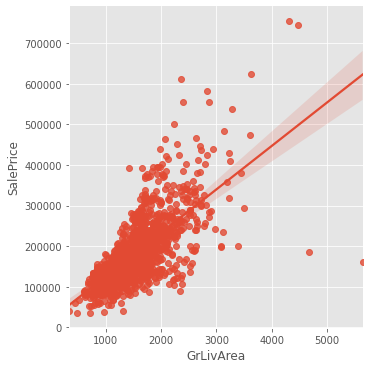

In [9]:
# scatter GrLivArea/SalePrice
sns.lmplot(x="GrLivArea", y="SalePrice", data=propiedades)

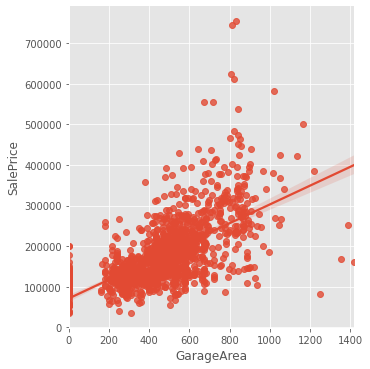

In [10]:
# scatter GarageArea/SalePrice
sns.lmplot(x="GarageArea", y="SalePrice", data=propiedades)

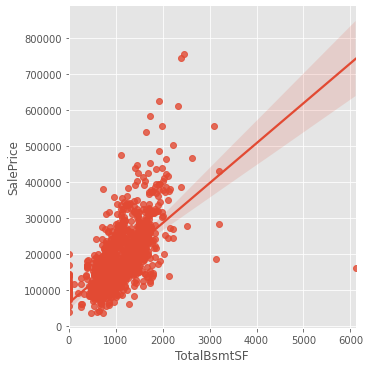

In [11]:
# scatter TotalBsmtSF/SalePrice
sns.lmplot(x="TotalBsmtSF", y="SalePrice", data=propiedades)

In [12]:
# categorical var

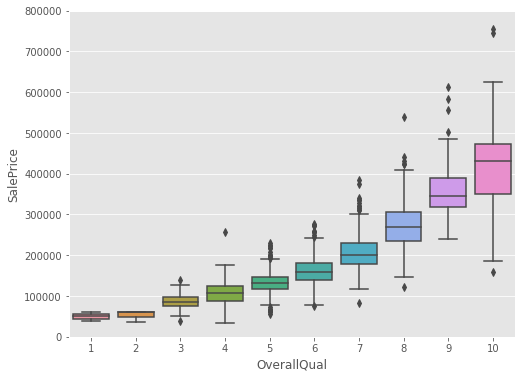

In [13]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([propiedades['SalePrice'], propiedades[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

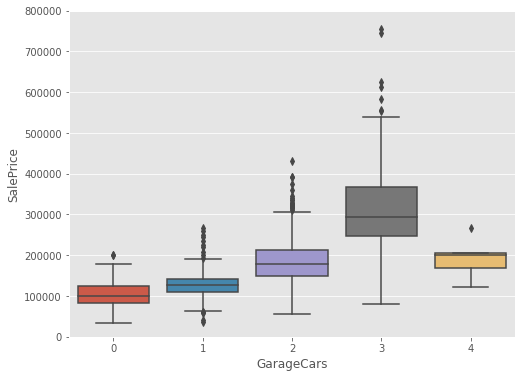

In [14]:
#box plot GarageCars/saleprice
var = 'GarageCars'
data = pd.concat([propiedades['SalePrice'], propiedades[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [15]:
# create a correlation heatmap to explore all variables

<AxesSubplot:>

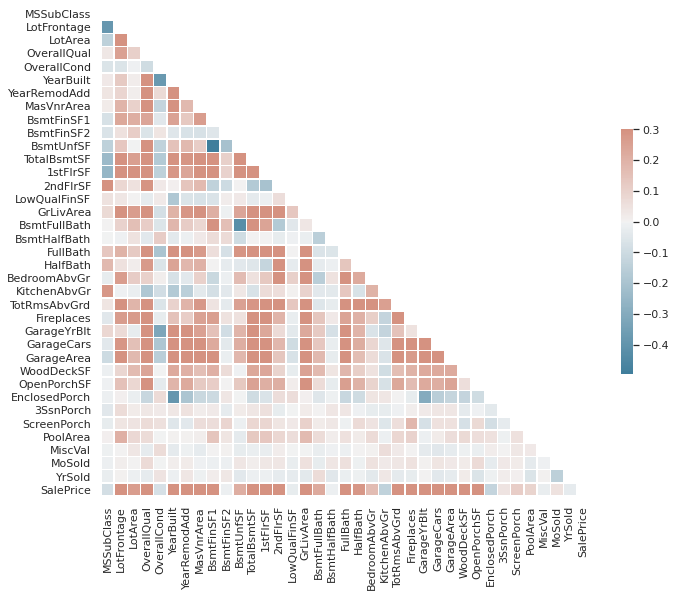

In [16]:
sns.set_theme(style="white")
# Compute the correlation matrix
corr = propiedades.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [17]:
# lets explore nan values

In [18]:
propiedades['MSSubClass'] = propiedades['MSSubClass'].astype('object')

In [19]:
propiedades['MoSold'] = propiedades['MoSold'].astype('object')

In [20]:
propiedades_df = propiedades.copy()
propiedades_df.shape

(1460, 80)

In [21]:
nan_cols = propiedades_df.columns[propiedades_df.isnull().any()]

In [22]:
nan_cols

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [23]:
propiedades.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [24]:
#elimino columnas con más del 50%
for column in nan_cols:
    if propiedades_df[column].isnull().sum()*100.0/propiedades_df.shape[0] > 50:
        propiedades_df.drop(column,1, inplace=True)

In [25]:
pd.DataFrame(propiedades_df.isnull().sum().sort_values(ascending = False)).head(20)


,0
FireplaceQu,690
LotFrontage,259
GarageCond,81
GarageType,81
GarageYrBlt,81
GarageFinish,81
GarageQual,81
BsmtExposure,38
BsmtFinType2,38
BsmtFinType1,37


In [26]:
def nan_to_median(df):
    for x in list(median_doldur):
        df[x] = df[x].fillna(df[x].median())
    return df

def nan_to_mode(df):
    for x in list(mode_doldur):
        df[x] = df[x].fillna(df[x].mode().iloc[0])
    return df


median_doldur = ["GarageYrBlt","MasVnrArea"]


mode_doldur = ["GarageType","GarageFinish","GarageQual","GarageCond","BsmtExposure","BsmtFinType2",
              "BsmtQual","BsmtCond","BsmtFinType1","MasVnrType","Electrical","MSZoning","Functional",'Utilities']

df = nan_to_median(propiedades_df)
df = nan_to_mode(propiedades_df)

In [27]:
nulls = pd.DataFrame(df.isnull().sum().sort_values(ascending = False))
nulls

,0
FireplaceQu,690
LotFrontage,259
SalePrice,0
ExterCond,0
RoofMatl,0
...,...
KitchenAbvGr,0
KitchenQual,0
TotRmsAbvGrd,0
Functional,0


In [28]:
df.drop(columns=['FireplaceQu', 'LotFrontage'], inplace=True)

In [29]:
nulls = pd.DataFrame(df.isnull().sum().sort_values(ascending = False))
nulls

,0
SalePrice,0
RoofStyle,0
Exterior1st,0
Exterior2nd,0
MasVnrType,0
...,...
KitchenAbvGr,0
KitchenQual,0
TotRmsAbvGrd,0
Functional,0


In [30]:
# select numeric var
df_numerics_only = df.select_dtypes(include=np.number)
df_numerics_only

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,8450,7,5,2003,2003,196.0,706,0,150,856,...,548,0,61,0,0,0,0,0,2008,208500
2,9600,6,8,1976,1976,0.0,978,0,284,1262,...,460,298,0,0,0,0,0,0,2007,181500
3,11250,7,5,2001,2002,162.0,486,0,434,920,...,608,0,42,0,0,0,0,0,2008,223500
4,9550,7,5,1915,1970,0.0,216,0,540,756,...,642,0,35,272,0,0,0,0,2006,140000
5,14260,8,5,2000,2000,350.0,655,0,490,1145,...,836,192,84,0,0,0,0,0,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,7917,6,5,1999,2000,0.0,0,0,953,953,...,460,0,40,0,0,0,0,0,2007,175000
1457,13175,6,6,1978,1988,119.0,790,163,589,1542,...,500,349,0,0,0,0,0,0,2010,210000
1458,9042,7,9,1941,2006,0.0,275,0,877,1152,...,252,0,60,0,0,0,0,2500,2010,266500


In [31]:
y_target=df_numerics_only['SalePrice']
x_train=df_numerics_only.drop(['SalePrice'],axis=1)


In [32]:
pca = PCA()
pca.fit(x_train)

PCA()

In [33]:
pca.explained_variance_ratio_

array([9.84813909e-01, 4.94927889e-03, 3.38800147e-03, 2.77570462e-03,
       2.41491084e-03, 5.01364397e-04, 3.23773207e-04, 2.98304318e-04,
       2.27529751e-04, 1.38776142e-04, 4.13303700e-05, 3.36183732e-05,
       3.04033800e-05, 2.81085218e-05, 1.49483754e-05, 8.40943647e-06,
       8.18508531e-06, 2.04804909e-06, 1.34369526e-06, 1.71533896e-08,
       9.47282295e-09, 8.62240633e-09, 6.24114587e-09, 2.83825691e-09,
       2.41006947e-09, 1.76711697e-09, 1.41545795e-09, 1.04024103e-09,
       7.71954491e-10, 4.64253943e-10, 3.35135448e-10, 9.82658776e-33,
       9.82658776e-33])

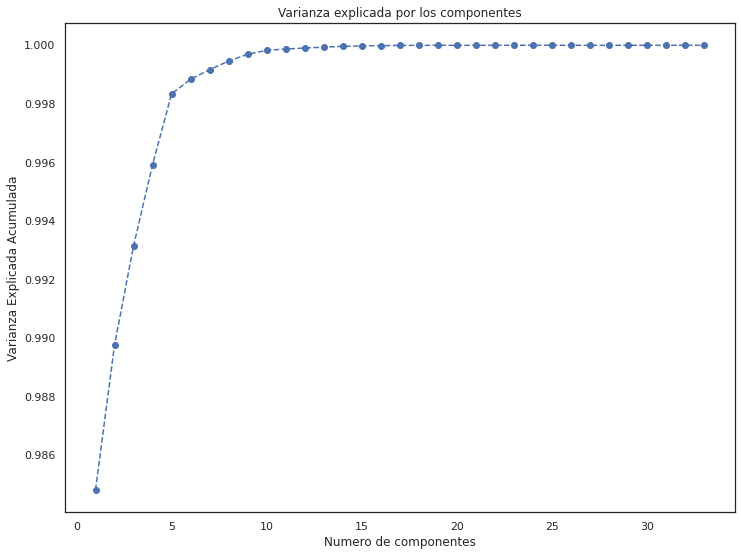

In [34]:
plt.figure(figsize=(12,9))
plt.plot(range(1,34), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle="--")
plt.title("Varianza explicada por los componentes")
plt.xlabel("Numero de componentes")
plt.ylabel("Varianza Explicada Acumulada"); #Regla de oro es quedarnos con el 80% de la varianza

In [35]:
pca = PCA(n_components= 3)
pca.fit(x_train)

PCA(n_components=3)

In [36]:
# Resultado de PCA
pca.components_

array([[ 9.99702854e-01,  1.48025320e-05, -6.54206961e-07,
         4.49387332e-05,  2.96887261e-05,  1.88398712e-03,
         9.82483365e-03,  1.79654254e-03, -1.01898080e-04,
         1.15194781e-02,  1.16475953e-02,  2.24448677e-03,
         2.34749195e-05,  1.39155570e-02,  8.24574833e-06,
         1.14862881e-06,  7.00023536e-06,  7.33466302e-07,
         9.81258099e-06, -3.91491344e-07,  3.10875302e-05,
         1.75673318e-05, -6.08300314e-05,  1.16574276e-05,
         3.88353374e-03,  2.16117037e-03,  5.65952548e-04,
        -1.12976102e-04,  6.01410015e-05,  2.42009689e-04,
         3.13710743e-04,  1.89413624e-03, -1.90090732e-06],
       [-2.27520223e-02,  1.31987714e-03, -2.49239551e-04,
         1.58300533e-02,  1.05960450e-02,  1.18011720e-01,
         2.39065876e-01, -1.00171420e-02,  2.53067947e-01,
         4.82116682e-01,  4.22212601e-01,  1.92424338e-01,
         2.98275605e-03,  6.17619695e-01,  1.03043002e-04,
        -1.06348122e-05,  4.44117171e-04,  1.61114681e-

In [37]:
df_pca_comp = pd.DataFrame(data=pca.components_,
                           columns = x_train.columns.values,
                           index = ['pc1', 'pc2', 'pc3']
                           )

df_pca_comp

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
pc1,0.999703,0.000015,-6.542070e-07,0.000045,0.000030,0.001884,0.009825,0.001797,-0.000102,0.011519,...,0.000012,0.003884,0.002161,0.000566,-0.000113,0.000060,0.000242,0.000314,0.001894,-0.000002
pc2,-0.022752,0.001320,-2.492396e-04,0.015830,0.010596,0.118012,0.239066,-0.010017,0.253068,0.482117,...,0.000578,0.173445,0.044017,0.030871,-0.004723,0.001399,0.007447,0.008561,-0.037867,-0.000055
pc3,-0.005549,-0.000169,-1.014154e-04,0.008094,-0.000703,0.007418,0.519650,0.027881,-0.216753,0.330779,...,-0.000004,0.025870,0.010042,-0.009910,-0.011308,0.001429,0.000690,0.001073,-0.039802,0.000075


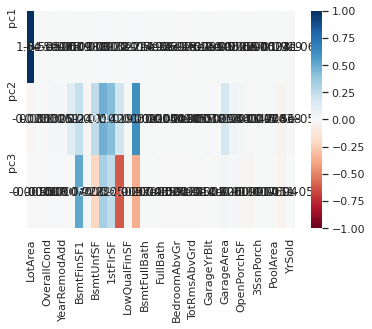

In [38]:
sns.heatmap(df_pca_comp,
            vmin = -1,
            vmax = 1,
            cmap='RdBu',
            annot=True
            )
plt.yticks([0,1,2],
           ['pc1', 'pc2', 'pc3']
           );

In [39]:
df_transform = pca.transform(x_train)

In [40]:
data_pca = pd.DataFrame(df_transform, index=x_train.index, columns=['pc1', 'pc2', 'pc3'])
data_pca.head()

,pc1,pc2,pc3
Id,,,
1,-2065.537609,18.605993,-283.979237
2,-912.067702,-10.686625,743.475632
3,734.165350,87.041565,-471.602925
4,-970.824169,-53.997585,-580.996429
5,3757.969589,638.485954,-536.903822


In [41]:
finalDf = pd.concat([data_pca, y_target], axis = 1)

In [42]:
#fit multiple linear regression model
model = ols('SalePrice ~ pc1+pc2+pc3', data=finalDf).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     818.7
Date:                Mon, 01 Feb 2021   Prob (F-statistic):          7.81e-312
Time:                        18:45:18   Log-Likelihood:                -17823.
No. Observations:                1460   AIC:                         3.565e+04
Df Residuals:                    1456   BIC:                         3.567e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.809e+05   1269.700    142.491      0.0